In [7]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

In [8]:
def freq_to_lambda(freq_Ghz): #Ghz
    c=299792458 # Speed of Light (m/s)
    lambda_m=c/(freq_Ghz*10**9)
    return lambda_m

In [9]:
def wipl_radiation_output_reader(path_to_file):
    ra1_df=pd.read_csv(path_to_file, sep=' ', skiprows=1, skipinitialspace=True,
                      names=['phi','theta','E_phi_real','E_phi_imag','E_theta_real','E_theta_imag', 'RCS','RCS_dB'])
          
    if len(path_to_file.split('/')[-1].split('_'))==8:
        ra1_dict={'BugType' : path_to_file.split('/')[-1].split('_')[0], 
                  'Specimen_Number' : path_to_file.split('/')[-1].split('_')[1],
                  'BodyType' : path_to_file.split('/')[-1].split('_')[2],
                  'WingPositioning' : path_to_file.split('/')[-1].split('_')[3],
                  'Resolution' : int(path_to_file.split('/')[-1].split('_')[4])/10,
                  'Scale' : int(path_to_file.split('/')[-1].split('_')[5])/10,
                  'Frequency' : int(path_to_file.split('/')[-1].split('_')[6])/10,
                  'InternalDomain' : path_to_file.split('/')[-1].split('_')[7].split('.')[0],
                  'WingDomain' : 'NA'
                  }
    elif len(path_to_file.split('/')[-1].split('_'))==9:
        ra1_dict={'BugType' : path_to_file.split('/')[-1].split('_')[0], 
                  'Specimen_Number' : path_to_file.split('/')[-1].split('_')[1],
                  'BodyType' : path_to_file.split('/')[-1].split('_')[2],
                  'WingPositioning' : path_to_file.split('/')[-1].split('_')[3],
                  'Resolution' : int(path_to_file.split('/')[-1].split('_')[4])/10,
                  'Scale' : int(path_to_file.split('/')[-1].split('_')[5])/10,
                  'Frequency' : int(path_to_file.split('/')[-1].split('_')[6])/10,
                  'InternalDomain' : path_to_file.split('/')[-1].split('_')[7],
                  'WingDomain' : path_to_file.split('/')[-1].split('_')[8].split('.')[0]
                  }
    
    
    return ra1_df, ra1_dict

In [10]:
def plot_rcs_component(ax, E,x,y,z,titlestr):
    norm = colors.Normalize(vmin=np.min(E),vmax=np.max(E))
    plot = ax.plot_surface(
    x, y, z, facecolors=cm.jet(norm(E)), 
    cmap=cm.jet, rstride=1, cstride=1, 
    shade=False, antialiased=False, alpha=1)
    # Add a color bar which maps values to colors.
    m = cm.ScalarMappable(cmap=plt.cm.jet, norm=norm)
    m.set_array([])
    plt.colorbar(m,shrink=0.5, aspect=5)
    plt.title(titlestr)
    el=30
    az=202.5
    ax.view_init(elev=el, azim=az)


In [13]:
Locust ='/Users/rrniii/Dropbox/BioDAR_EM_Modelling/Finished_Files/Locust_Legs/Locust_SS1_Full_M_0100_1000_94_MirkLGB_ChenMeanLeggy.ra1'

In [14]:
ra1_df_Locust, ra1_dict_Locust = wipl_radiation_output_reader(Locust)

In [7]:
ra1_df_Locust

,phi,theta,E_phi_real,E_phi_imag,E_theta_real,E_theta_imag,RCS,RCS_dB
0,0.0,-90.0,-0.000119,0.000091,0.007267,8.713795e-04,0.661090,-1.797393
1,0.0,-89.0,-0.000132,0.000105,0.008065,6.524638e-04,0.808080,-0.925454
2,0.0,-88.0,-0.000143,0.000119,0.008856,3.611315e-04,0.969614,-0.134011
3,0.0,-87.0,-0.000153,0.000136,0.009623,3.264999e-07,1.142951,0.580277
4,0.0,-86.0,-0.000160,0.000154,0.010350,-4.252224e-04,1.324367,1.220083
...,...,...,...,...,...,...,...,...
65336,360.0,86.0,-0.000196,-0.000054,0.002232,-1.630991e-03,0.094805,-10.231667
65337,360.0,87.0,-0.000184,-0.000073,0.002303,-2.195589e-03,0.125396,-9.017152
65338,360.0,88.0,-0.000171,-0.000091,0.002397,-2.763654e-03,0.165548,-7.810751
65339,360.0,89.0,-0.000155,-0.000108,0.002518,-3.324940e-03,0.215065,-6.674302


In [8]:
ra1_dict_Locust

{'BugType': 'Locust',
 'Specimen_Number': 'SS1',
 'BodyType': 'Full',
 'WingPositioning': 'M',
 'Resolution': 10.0,
 'Scale': 100.0,
 'Frequency': 9.4,
 'InternalDomain': 'MirkLGB',
 'WingDomain': 'ChenMeanLeggy'}

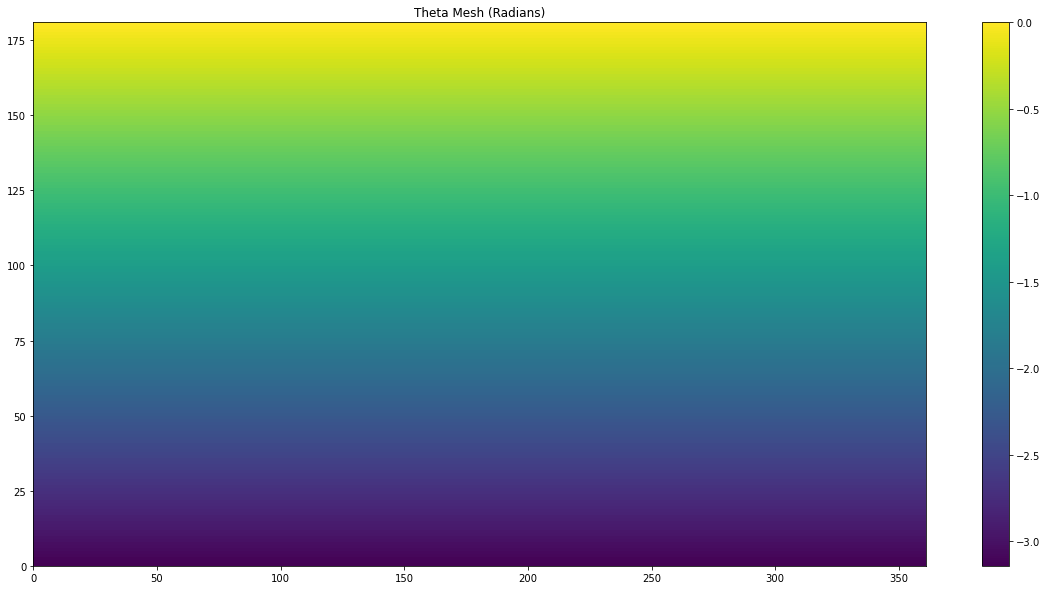

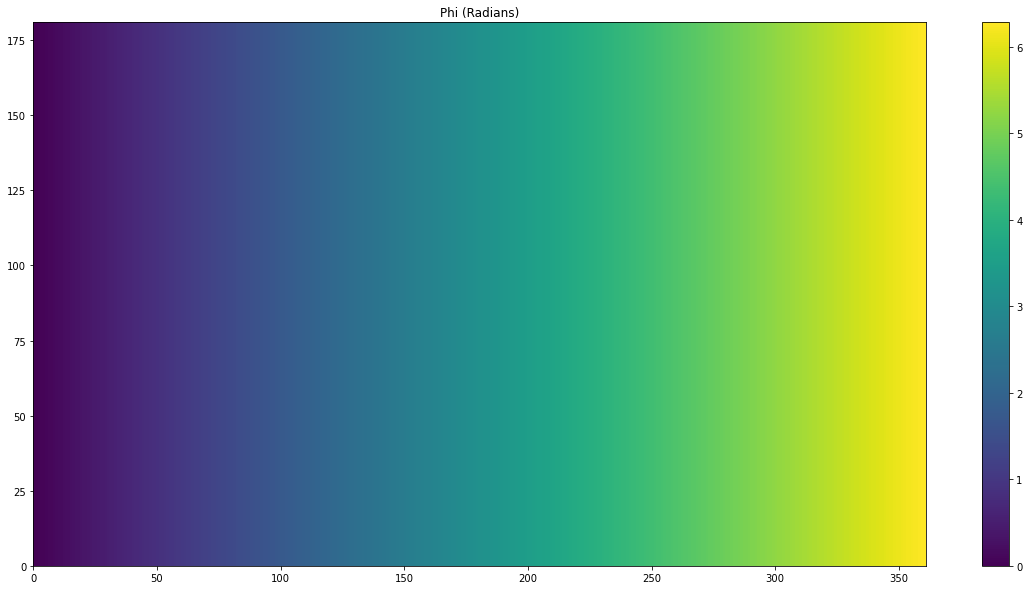

In [9]:
#Get Data from pandas df to create mesh of phi and theta
stride=1
theta=ra1_df_Locust['theta'][0:181:stride]
phi=ra1_df_Locust['phi'][0:-1:stride*181]
phi_mesh, theta_mesh = np.meshgrid(np.deg2rad(phi), np.deg2rad(theta)-np.pi/2)

fig = plt.figure(figsize=(20,10))
ax0 = fig.add_subplot(111)
plot = ax0.pcolormesh(theta_mesh)
fig.colorbar(plot, ax=ax0)
plt.title('Theta Mesh (Radians)')
plt.show()

fig = plt.figure(figsize=(20,10))
ax0 = fig.add_subplot(111)
plot = ax0.pcolormesh(phi_mesh)
fig.colorbar(plot, ax=ax0)
plt.title('Phi (Radians)')
plt.show()

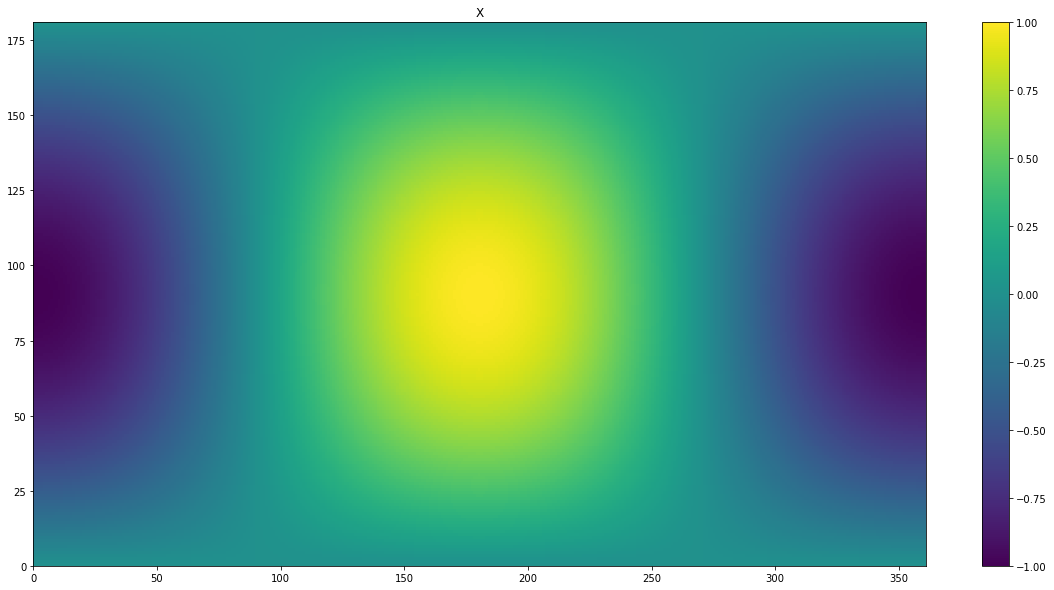

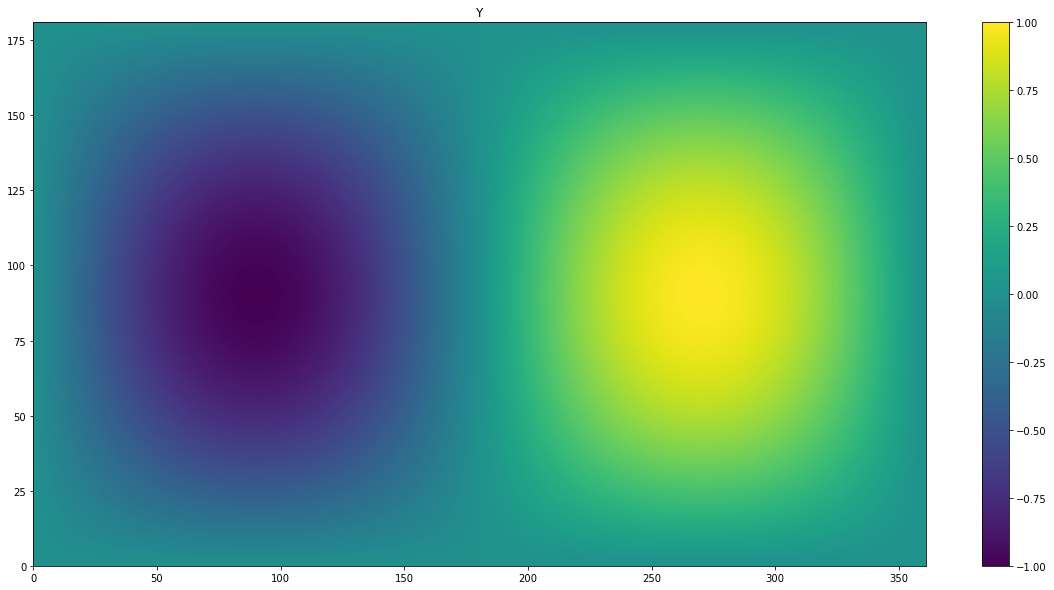

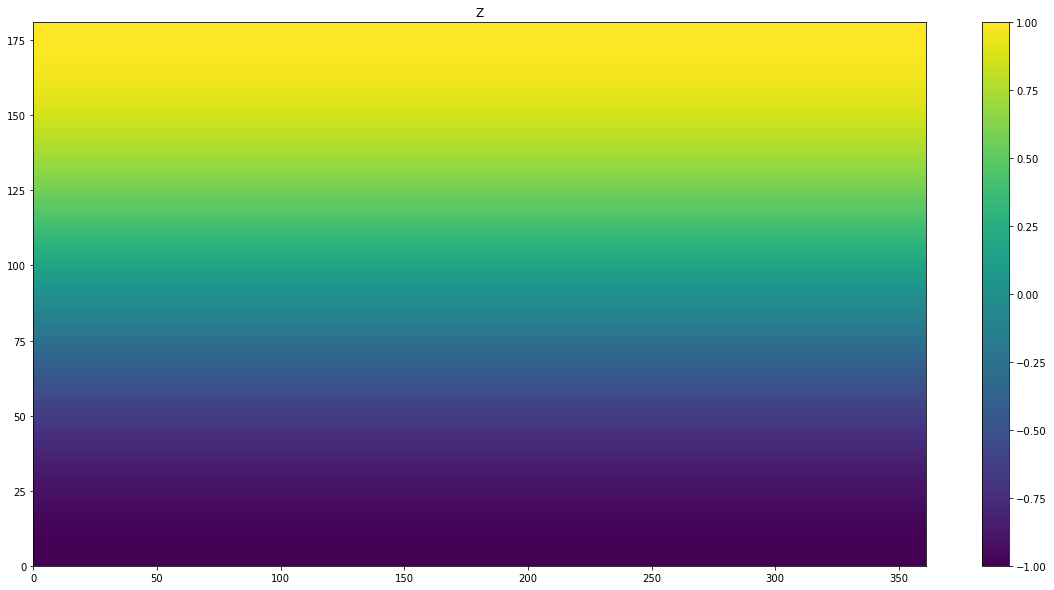

In [10]:
# Create Cartesian coordinates of the unit sphere
x = np.sin(theta_mesh) * np.cos(phi_mesh)
y = np.sin(theta_mesh) * np.sin(phi_mesh)
z = np.cos(theta_mesh)

fig = plt.figure(figsize=(20,10))
ax0 = fig.add_subplot(111)
plot = ax0.pcolormesh(x)
fig.colorbar(plot, ax=ax0)
plt.title('X')
plt.show()

fig = plt.figure(figsize=(20,10))
ax0 = fig.add_subplot(111)
plot = ax0.pcolormesh(y)
fig.colorbar(plot, ax=ax0)
plt.title('Y')
plt.show()

fig = plt.figure(figsize=(20,10))
ax0 = fig.add_subplot(111)
plot = ax0.pcolormesh(z)
fig.colorbar(plot, ax=ax0)
plt.title('Z')
plt.show()

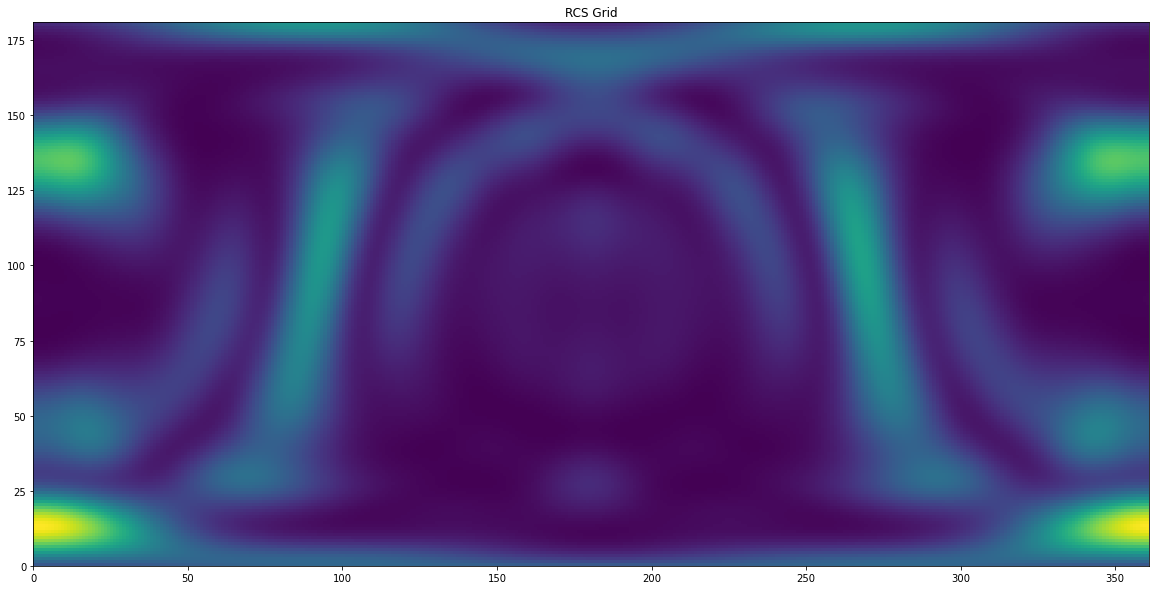

In [11]:
#Rectilinear Plot of RCS to check reshaping of array

RCS=np.transpose(np.asarray(ra1_df_Locust['RCS']).reshape(361,181))
fig = plt.figure(figsize=(20,10))
ax0 = fig.add_subplot(111)
plot = ax0.pcolormesh(RCS)
plt.title('RCS Grid')
plt.show()

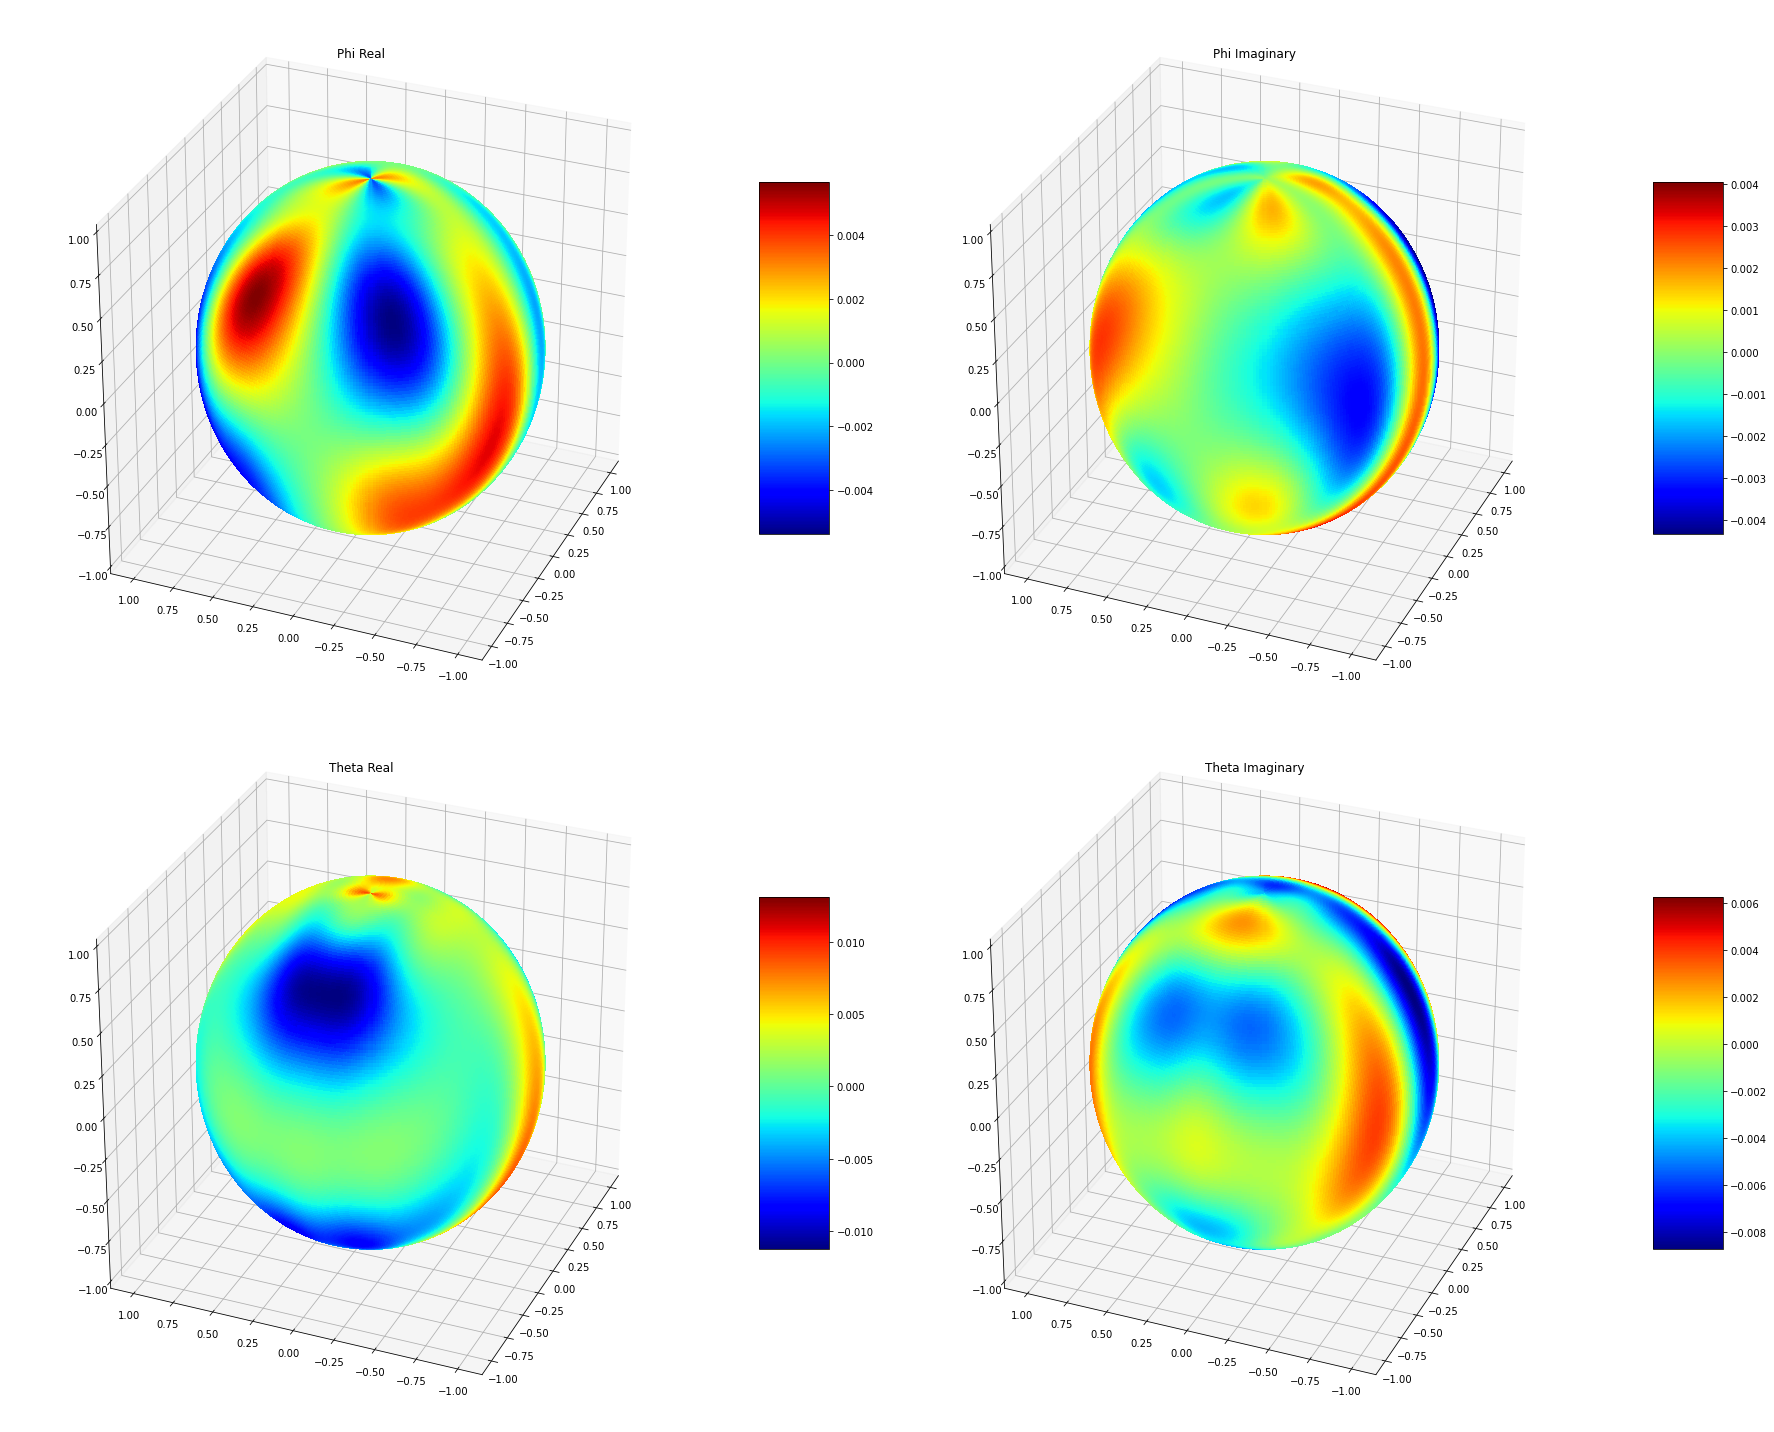

In [25]:
# Plot 4 components on Unit Sphere

E_phi_real=np.transpose(np.asarray(ra1_df_Locust['E_phi_real']).reshape(361,181))
E_phi_imag=np.transpose(np.asarray(ra1_df_Locust['E_phi_imag']).reshape(361,181))
E_theta_real=np.transpose(np.asarray(ra1_df_Locust['E_theta_real']).reshape(361,181))
E_theta_imag=np.transpose(np.asarray(ra1_df_Locust['E_theta_imag']).reshape(361,181))


fig = plt.figure(figsize=(25,20))
ax0 = fig.add_subplot(221,projection='3d')
plot_rcs_component(ax0,E_phi_real,x,y,z,'Phi Real')

ax1 = fig.add_subplot(222,projection='3d')
plot_rcs_component(ax1,E_phi_imag,x,y,z,'Phi Imaginary')

ax2 = fig.add_subplot(223,projection='3d')
plot_rcs_component(ax2,E_theta_real,x,y,z,'Theta Real')

ax3 = fig.add_subplot(224,projection='3d')
plot_rcs_component(ax3,E_theta_imag,x,y,z,'Theta Imaginary')

fig.tight_layout()

plt.show()

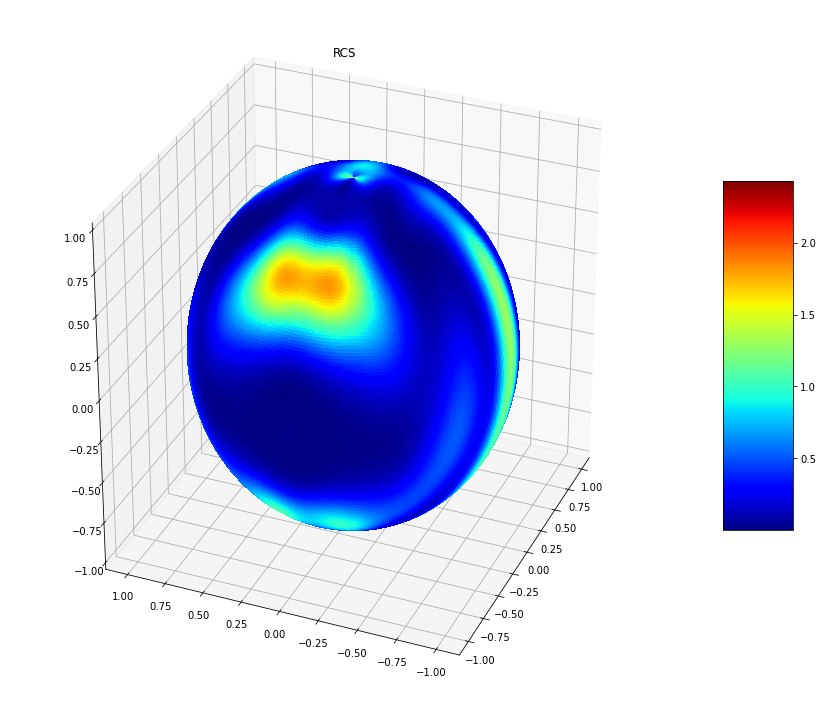

In [22]:
#Plot RCS (Linear Units) on Unit Sphere

RCS=np.transpose(np.asarray(ra1_df_Locust['RCS']).reshape(361,181))

fig = plt.figure(figsize=(12,10))
ax0 = fig.add_subplot(111,projection='3d')
plot_rcs_component(ax0,RCS,x,y,z,'RCS')
ax0.view_init(elev=30., azim=202.5)
fig.tight_layout()
plt.show()

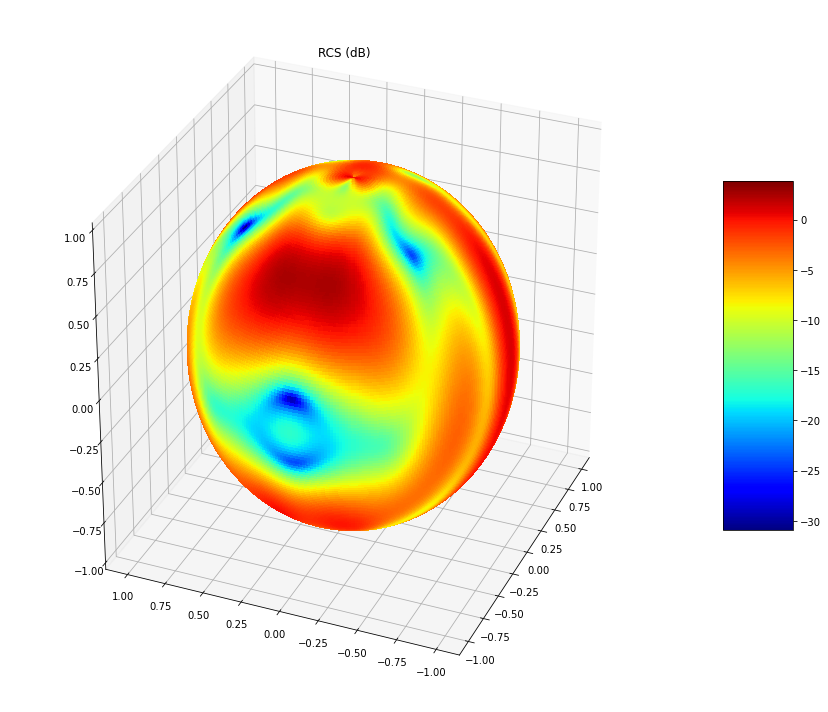

In [23]:
#Plot RCS in dB on Unit Sphere
RCS=np.transpose(np.asarray(ra1_df_Locust['RCS_dB']).reshape(361,181))

fig = plt.figure(figsize=(12,10))
ax0 = fig.add_subplot(111,projection='3d')
plot_rcs_component(ax0,RCS,x,y,z,'RCS (dB)')
ax0.view_init(elev=30., azim=202.5)
fig.tight_layout()

plt.show()

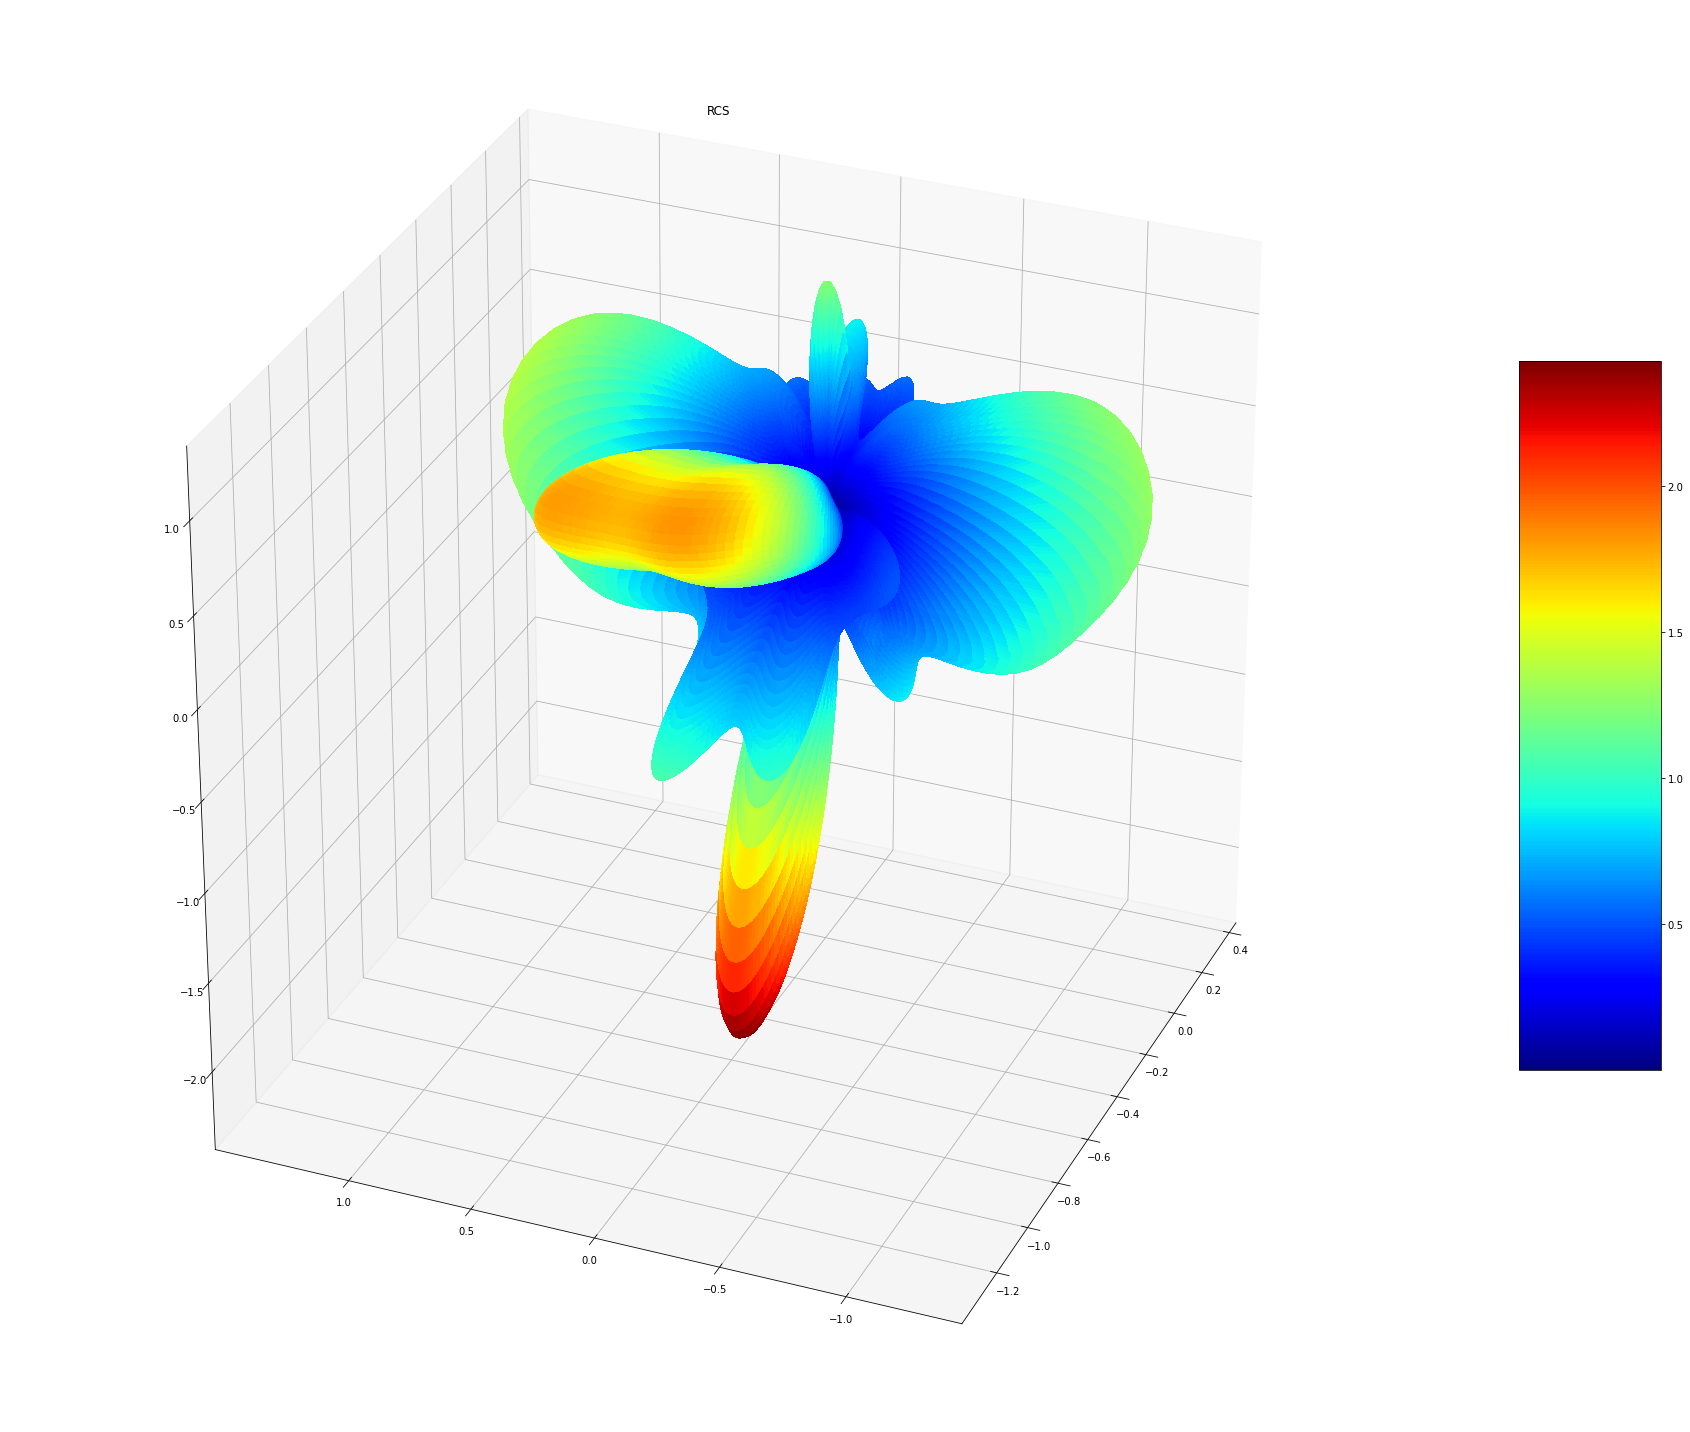

In [24]:
#Plot RCS 3D
RCS=np.transpose(np.asarray(ra1_df_Locust['RCS']).reshape(361,181))

# Create Cartesian coordinates of the unit sphere
x_RCS = RCS*np.sin(theta_mesh) * np.cos(phi_mesh)
y_RCS = RCS*np.sin(theta_mesh) * np.sin(phi_mesh)
z_RCS = RCS*np.cos(theta_mesh)

fig = plt.figure(figsize=(25,20))
ax0 = fig.add_subplot(111,projection='3d')
plot_rcs_component(ax0,RCS,x_RCS,y_RCS,z_RCS,'RCS')
ax0.view_init(elev=30., azim=202.5)
fig.tight_layout()

plt.show()

### WiPL Plot
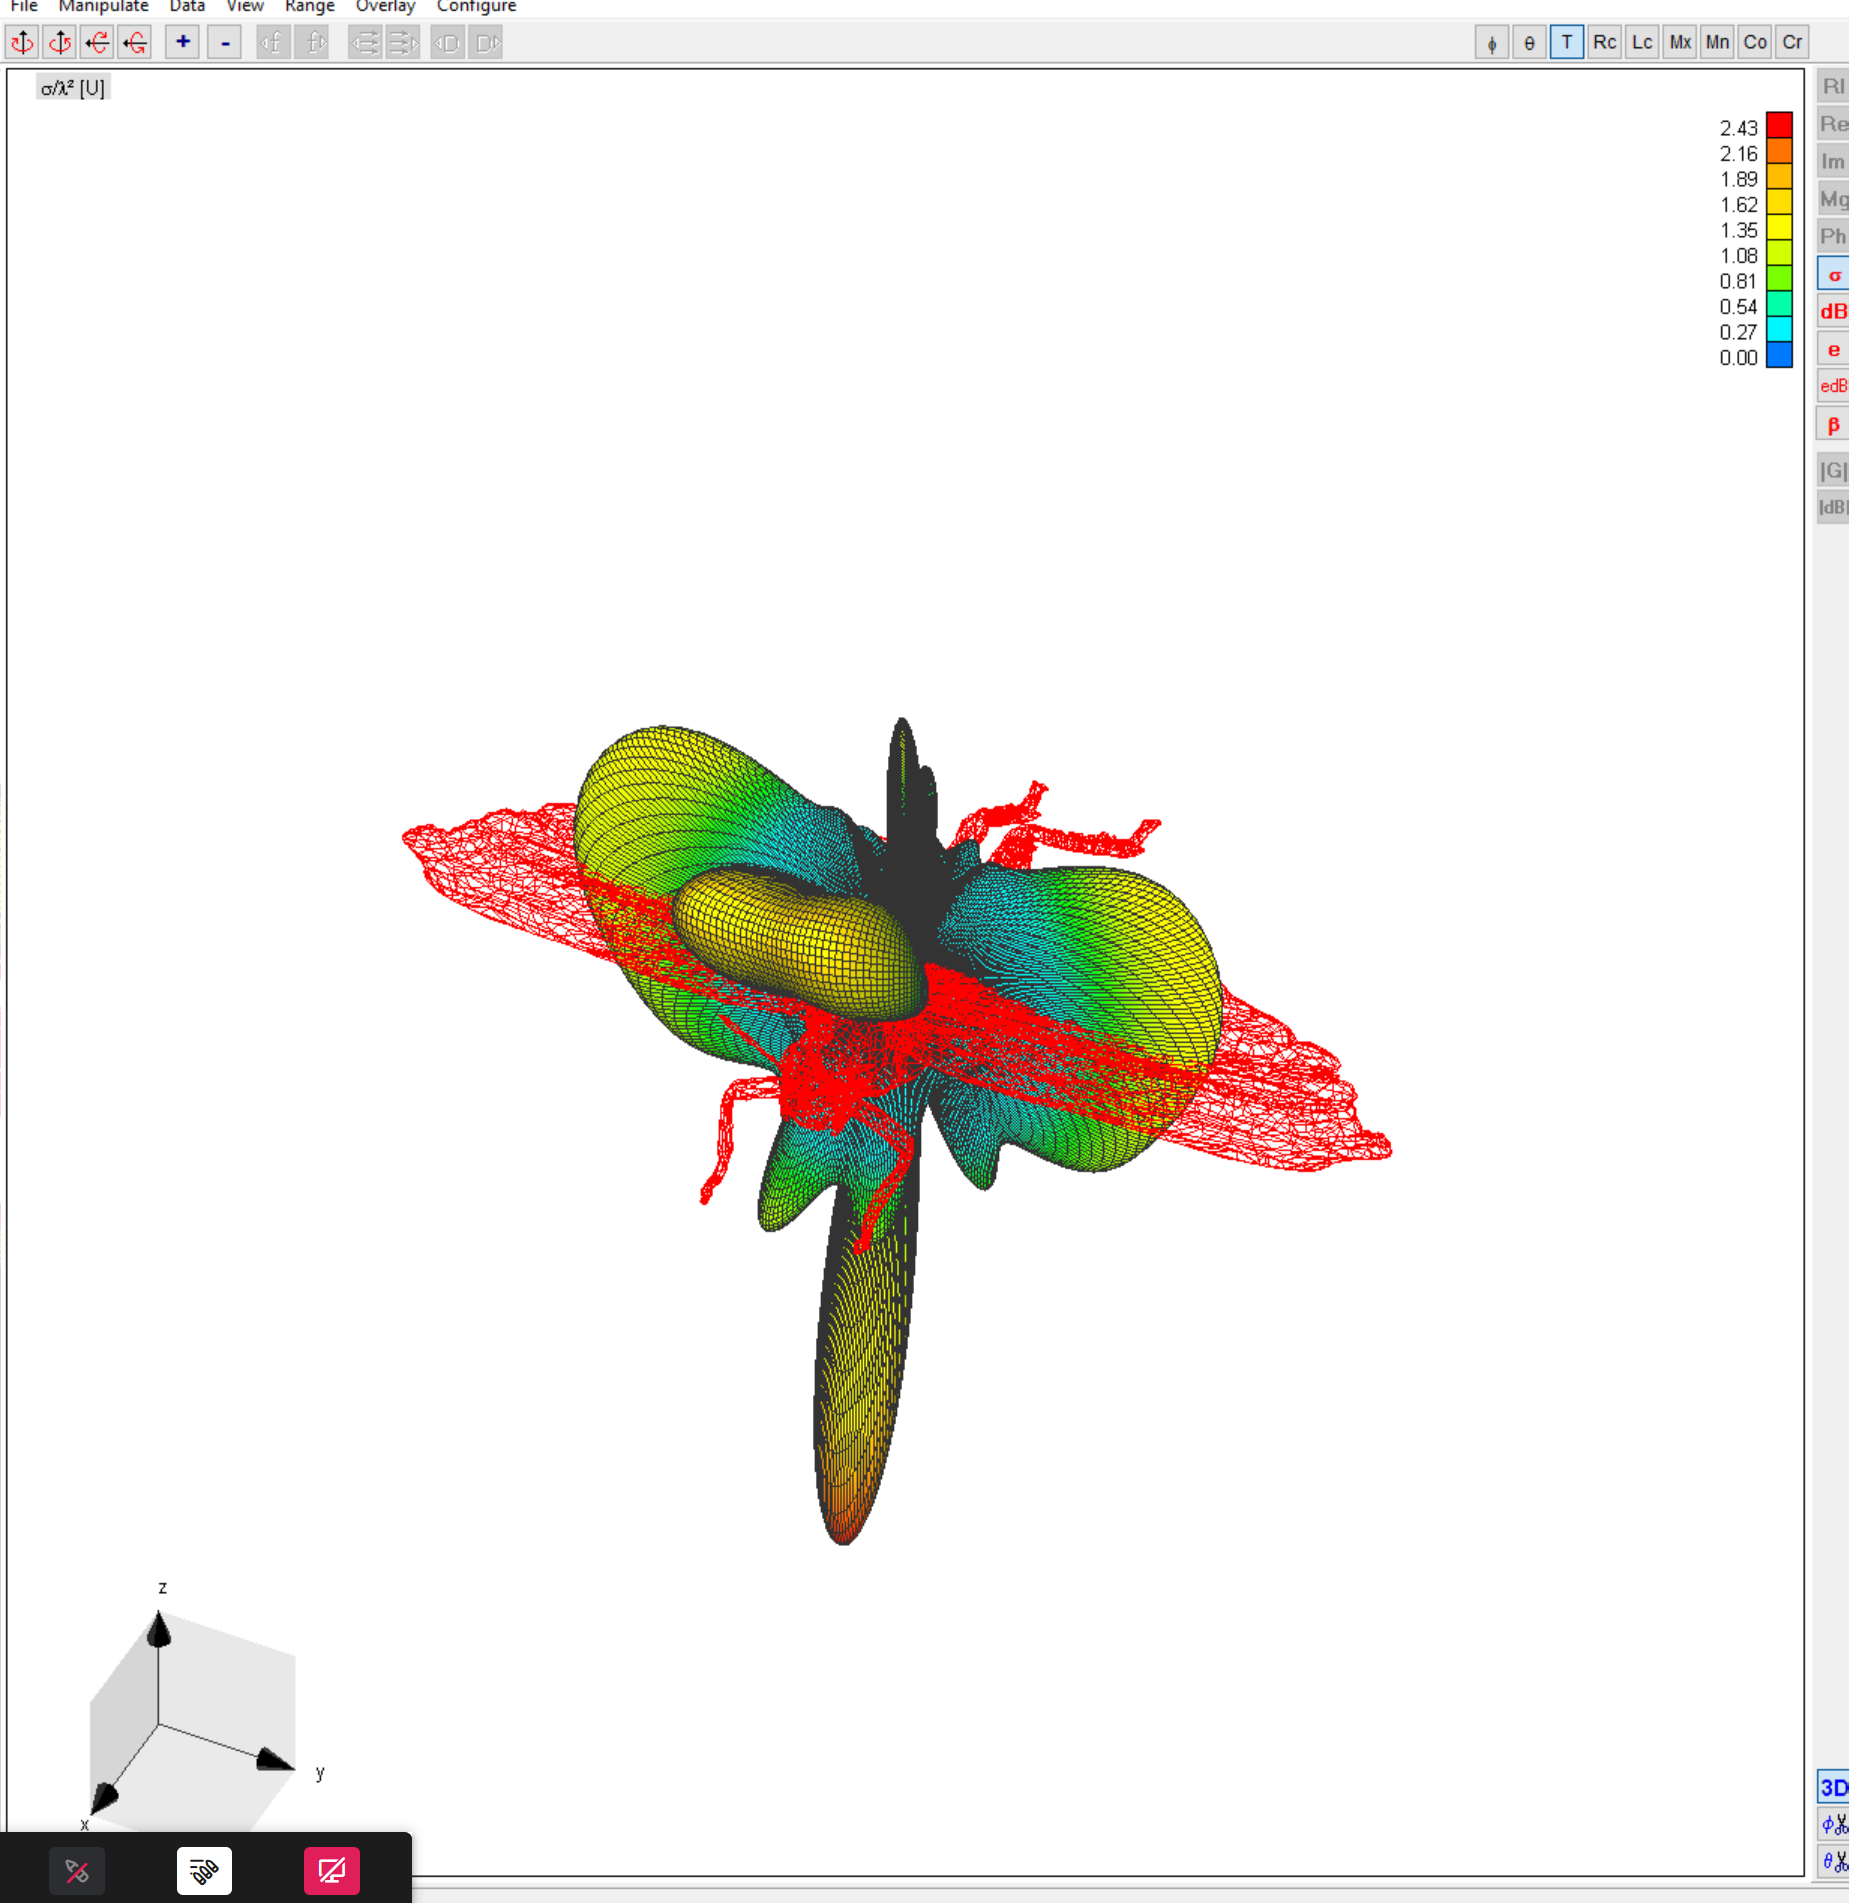